In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def CV_now(tm, CVS, CVD):
    tc = np.fmod(tm, T)
    # tc=time in the current cycle, measured from start of systole.
    if tc < TS:
        e = (1.0 - np.exp(-tc / tauS)) / (1.0 - np.exp(-TS / tauS))
        CV = CVD * np.power((CVS / CVD), e)
    else:
        e = (1 - np.exp(-(tc - TS) / tauD)) / (1 - np.exp(-(T - TS) / tauD))
        CV = CVS * np.power((CVD / CVS), e)
    return CV


def QAo_now(ti):
    tc = np.fmod(ti, T)
    # tc = time elapsed since the beginning of the current cycle
    if tc < TS:
        # Systole
        if tc < TMAX:
            # BEFORE TIME OF MAXIMUM FLOW
            Q = QMAX*tc/TMAX
        else:
            # AFTER TIME OF PEAK FLOW:
            Q = QMAX*(TS-tc)/(TS-TMAX)
    else:
        # Diastole
        Q = 0
    return Q


def Psa_new(Psa_old, QA0):
    Psa_l = (Psa_old + (dt*(QA0/Csa)))/(1+(dt/(Rs*Csa)))
    return Psa_l


def sa_out():
    fig, a = plt.subplots(2)
    a[0].plot(t_plot.flatten(), QAo_plot.flatten())
    a[1].plot(t_plot.flatten(), Psa_plot.flatten())
    
    plt.show()

In [3]:
T = 0.0125    #Duration of heartbeat (minutes)
TS = 0.0050    #Duration of systole   (minutes)
TMAX = 0.0020  #Time at which flow is max (minutes)
QMAX = 28.0    #Max flow through aortic valve (liters/minute)
Rs = 17.86     #Systemic resistance (mmHg/(liter/minute))
Csa = 0.00175  #Systemic arterial compliance (liters/(mmHg))
#This value of Csa is approximate and will need adjustment
#to make the blood pressure be 120/80.
dt = 0.01*T    #Time step duration (minutes)
#This choice implies 100 timesteps per cardiac cycle.
klokmax = 15*int(T/dt)  #Total number of timesteps
#This choice implies simulation of 15 cardiac cycles.
Psa = 0           #Initial value of Psa (mmHg)
#Any initial value is OK here; try some others.
#Initialize arrays to store data for plotting:
t_plot = np.zeros((1, klokmax))
QAo_plot = np.zeros((1, klokmax))
Psa_plot = np.zeros((1, klokmax))

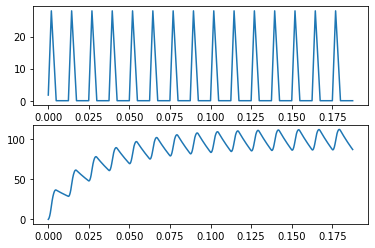

In [4]:
for klok in np.arange(klokmax):
    t = (klok+1)*dt
    QAo = QAo_now(t)
    Psa = Psa_new(Psa, QAo)  #new Psa overwrites old
    #Store values in arrays for future plotting:
    t_plot[0, klok] = t
    QAo_plot[0, klok] = QAo
    Psa_plot[0, klok] = Psa
#Now plot results in one figure 
#with QAo(t) in upper frame
#and Psa(t) in lower frame   
sa_out()